In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [124]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [125]:
churnData['TotalCharges'] = churnData['TotalCharges'].str.replace(' ','')
churnData[["TotalCharges"]] = churnData[["TotalCharges"]].apply(pd.to_numeric)

In [126]:
churnData['TotalCharges']=churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))


In [127]:
churnData.shape

(7043, 16)

In [128]:
Num = churnData.select_dtypes(np.number)
Num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [129]:
Num.shape

(7043, 4)

In [130]:
Categorical = churnData.select_dtypes(include=['object'])
Categorical.shape

(7043, 12)

In [131]:
Dummy = pd.get_dummies(data = Categorical,drop_first=True)
Dummy

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [132]:
Dummy['Churn_Yes'].value_counts() ### Here the 0s and 1s are imbalanced. So we will use K-folds cross validation method here.

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [133]:
5174/len(Dummy['Churn_Yes'])

0.7346301292063041

In [134]:
Df = pd.concat([Dummy,Num], axis=1)
Df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,29.85,29.85
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,34,56.95,1889.50
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,53.85,108.15
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,24,84.80,1990.50
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,72,103.20,7362.90
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,29.60,346.45
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,74.40,306.60


#### Defining X,y

In [135]:
X = Df.drop(columns=["Churn_Yes"], axis = 1)
y = Df["Churn_Yes"]

#### Data splitting

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [137]:
X_train.shape

(4930, 22)

#### Using smote upsmapling

In [138]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [139]:
y_train.value_counts()

0    3635
1    1295
Name: Churn_Yes, dtype: int64

In [140]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    3635
1    3635
Name: Churn_Yes, dtype: int64

### Using Decision tree classifier model to check the score

In [141]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train_sm, y_train_sm)
print(model.score(X_test, y_test))
print(model.score(X_train_sm, y_train_sm))


0.7207761476573592
0.9973865199449794


In [144]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, X_train_sm, y_train_sm, cv=5)
scores

array([0.68638239, 0.71458047, 0.82324622, 0.82393398, 0.8349381 ])

In [145]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.06


In [146]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5522    1
6377    1
5500    0
2392    0
6705    0
Name: Churn_Yes, Length: 2113, dtype: uint8

In [147]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [148]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1558]
 [   1  555]]


In [157]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
# Important: Never scale decision trees, other regressors and classifiers need to be scaled. 
model1 = DecisionTreeRegressor()

model2 = KNeighborsClassifier()

model3 = KNeighborsRegressor()
model4 = DecisionTreeClassifier()

model_pipeline = [model1, model2, model3, model4]
model_names = ['Regression Tree', 'Knn_classifier', 'KNN','DecisionTreeClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': -0.16598850432829113, 'Knn_classifier': 0.7676753782668502, 'KNN': 0.009746506834490876, 'DecisionTreeClassifier': 0.7774415405777166}


#### Applying decision tree clasifier to check recall precision and accuracy

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score #confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_train_sm, y_train_sm)

y_pred_train_dt = model.predict(X_train_sm)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_dt),
                                         precision_score(y_train_sm, y_pred_train_dt),
                                         recall_score(y_train_sm, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.819257,0.747279
1,Precision,0.782842,0.523981
2,Recall,0.883631,0.761324


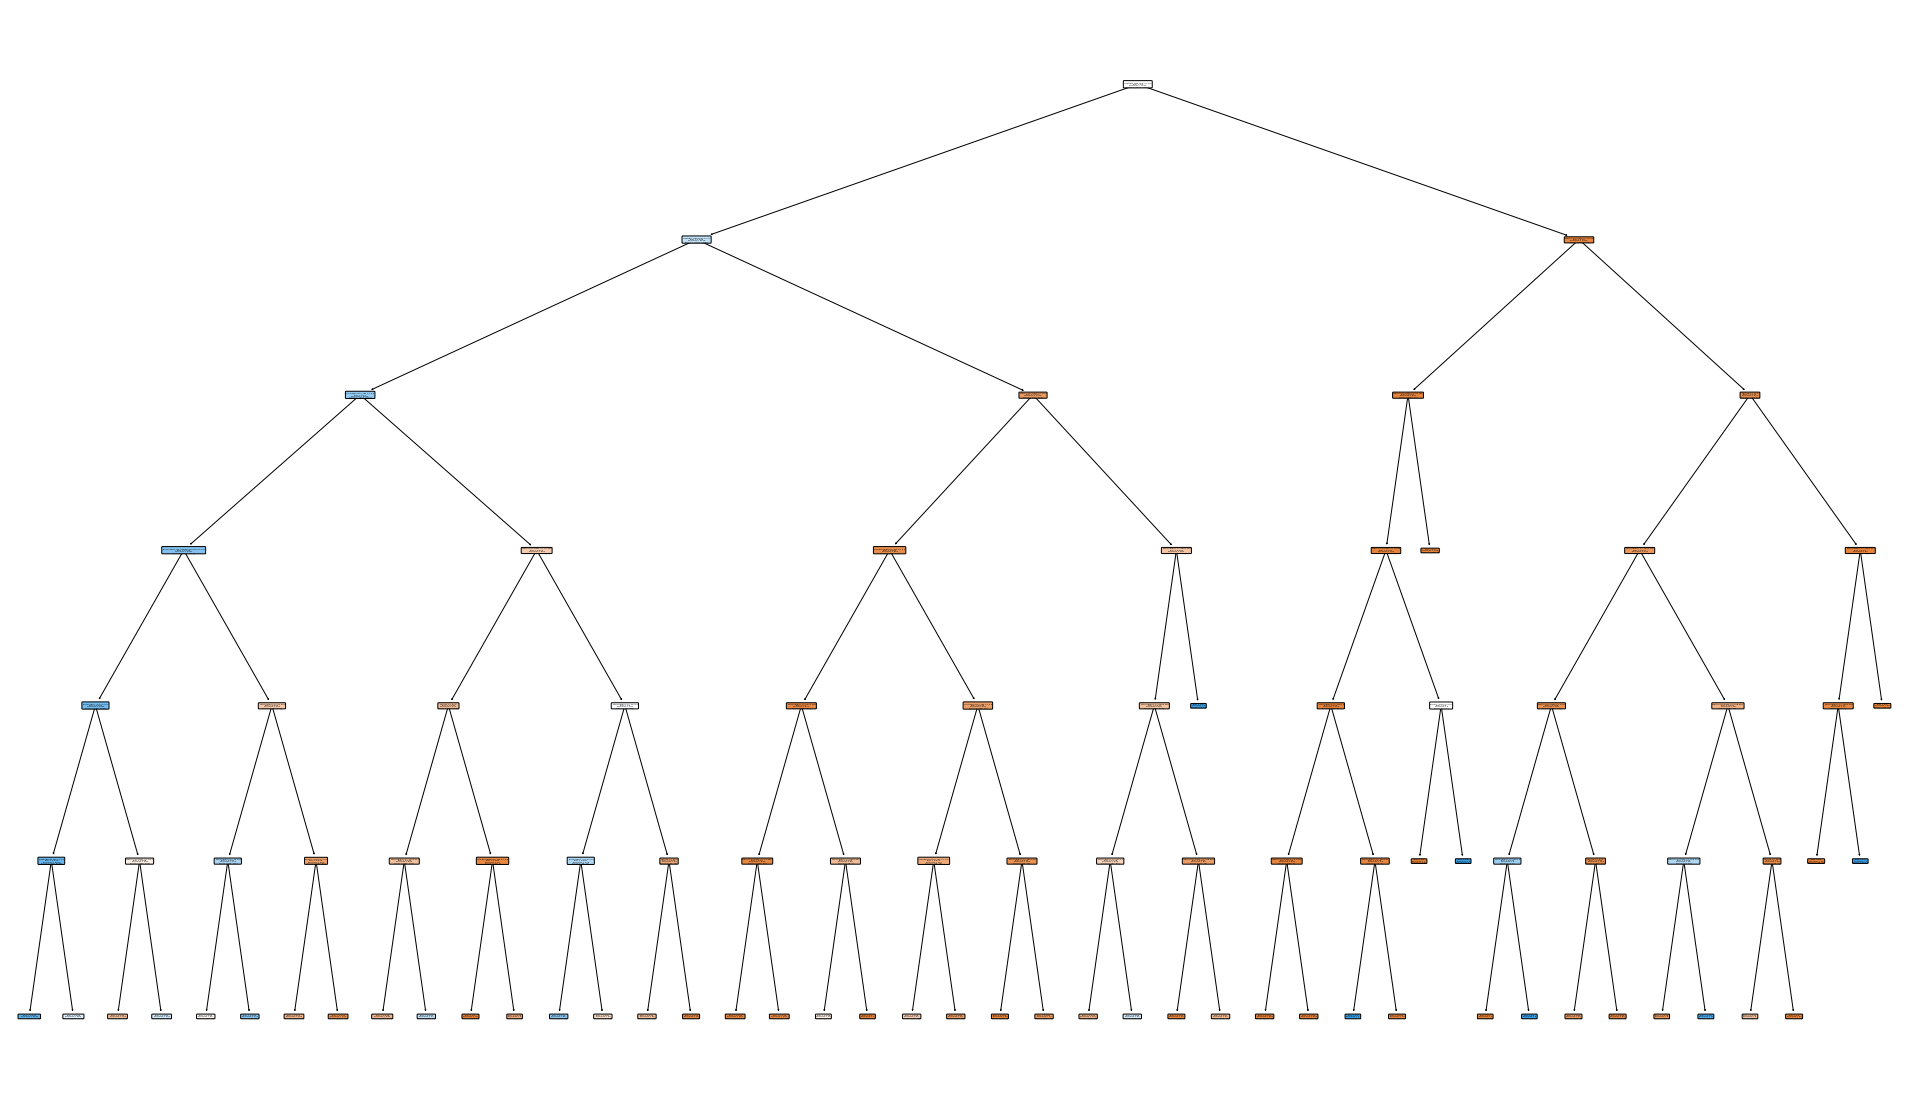

In [154]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

<BarContainer object of 22 artists>

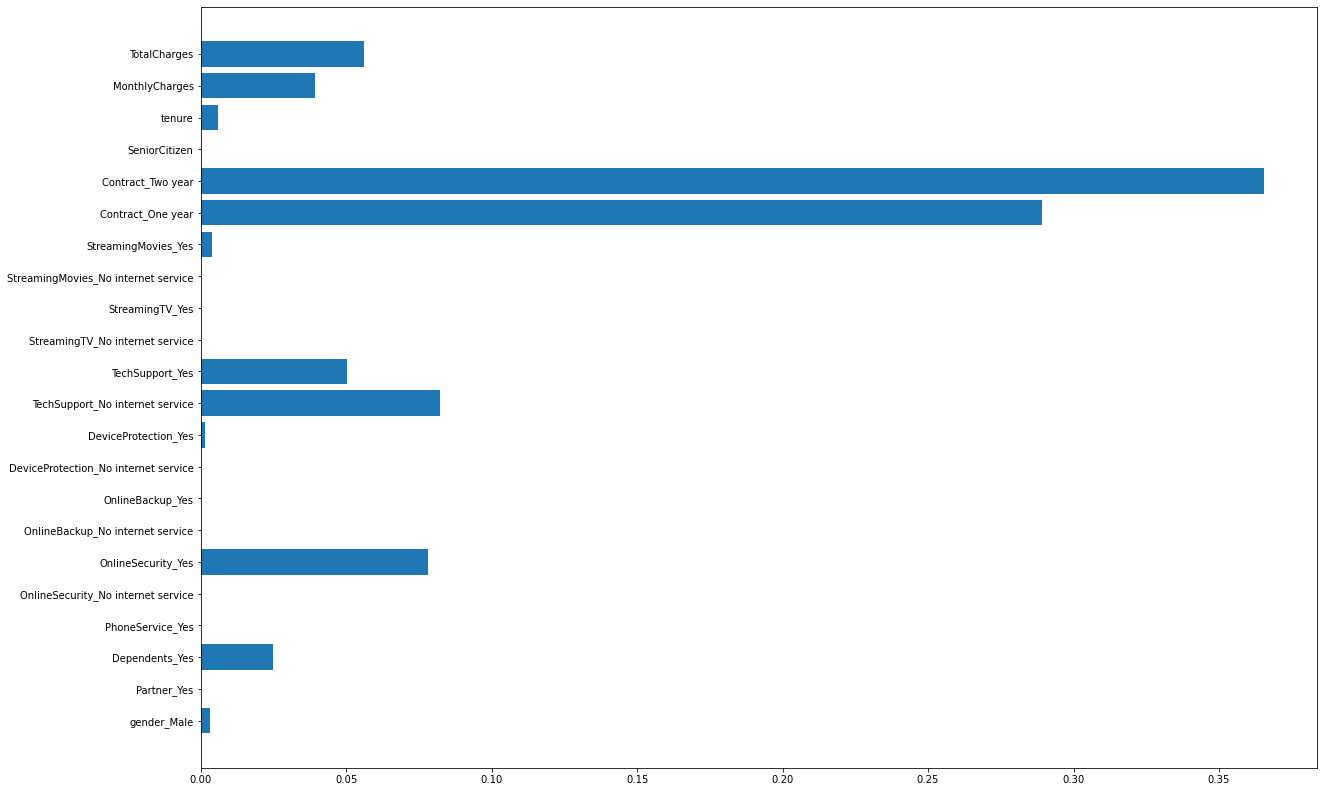

In [155]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

In [160]:
for k in range(3,10):
    
    models = {'k': [] }

    depth = DecisionTreeClassifier(max_depth=k)

    depth.fit(X_train_sm, y_train_sm)

    models['k'] = [k, depth]

    y_pred_train_classifier = depth.predict(X_train_sm)
    y_pred_test_classifier  = depth.predict(X_test)
    
    print(k, "Recall: ", recall_score(y_test, y_pred_test_classifier), "Accuracy: ", accuracy_score(y_test, y_pred_test_classifier), "Precision: ",precision_score(y_test, y_pred_test_classifier))


3 Recall:  0.7804878048780488 Accuracy:  0.6914339801230478 Precision:  0.459958932238193
4 Recall:  0.7735191637630662 Accuracy:  0.7378135352579271 Precision:  0.511520737327189
5 Recall:  0.7177700348432056 Accuracy:  0.7595835305253195 Precision:  0.5435356200527705
6 Recall:  0.7613240418118467 Accuracy:  0.747278750591576 Precision:  0.5239808153477218
7 Recall:  0.7003484320557491 Accuracy:  0.7567439659252247 Precision:  0.5403225806451613
8 Recall:  0.7282229965156795 Accuracy:  0.7624230951254141 Precision:  0.5471204188481675
9 Recall:  0.6951219512195121 Accuracy:  0.7477520113582584 Precision:  0.5270805812417437
